# Sant Llatzar and Magdalen Datasets
In this notebook, we subset the Sant Llatzar data (9 samples) and St Mary Magdalen data (5 samples) to conduct further analysis in single locations.

In [1]:
import allel
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle as pkl
import json
import umap

# for the maps
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

Now, we load up the dataset

In [2]:
vcf_path = 'data/variants.vcf.gz'
metadata = pd.read_csv("data/fixed.csv")

Now, we create the genotype matrix. 

In [3]:
# this reads the vcf file into a callset
callset = allel.read_vcf(vcf_path)

# this makes the genotype allele!
gt = allel.GenotypeArray(callset['calldata/GT'])
variants = pd.DataFrame({
    'CHROM': callset['variants/CHROM'],
    'POS': callset['variants/POS'],
    'ID': callset['variants/ID'],
    'REF': callset['variants/REF'],
    'ALT': [a[0] if isinstance(a, (list, tuple)) and len(a) > 0 else None for a in callset['variants/ALT']]
})

gt = gt.to_n_alt()

/Users/skylarwalters/miniconda3/envs/cs2370/lib/python3.13/site-packages/allel/io/vcf_read.py:1732: UserWarning: invalid INFO header: '##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">\n'
  warnings.warn('invalid INFO header: %r' % header)


Establish list of magdalen and llatzer samples

In [4]:
llatzer_inds = [1, 2, 3, 4, 5, 6, 9, 10, 11]
mary_inds = [16, 17, 18, 21, 22]

llatzer = gt[:, llatzer_inds]
print(f'Llatzer size: {llatzer.shape}')
magdalen = gt[:, mary_inds]
print(f'Magdalen size: {magdalen.shape}')


Llatzer size: (551, 9)
Magdalen size: (551, 5)


### Sant Llatzer Analysis

In [5]:
llatzer_meta = metadata.iloc[llatzer_inds]

In [6]:
llatzer_df = pd.DataFrame(llatzer.T)
samples = llatzer_meta["Sample_Name"]
ages = llatzer_meta["Age"]
llatzer_df.rows = samples

/var/folders/g2/5glzdcws7bbg271xmljmgdqh0000gn/T/ipykernel_25568/817418073.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  llatzer_df.rows = samples


In [7]:
n = llatzer_df.shape[0]
dist = np.zeros((n, n))

G = llatzer_df.values.astype(float)
n = G.shape[0]

dist = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        mask = ~np.isnan(G[i]) & ~np.isnan(G[j])
        d = np.sum(G[i,mask] != G[j,mask])
        dist[i,j] = dist[j,i] = d

llatzer_dist_df = pd.DataFrame(dist, index=ages, columns=ages)

Now, plot the seaborn heatmap.

/Users/skylarwalters/miniconda3/envs/cs2370/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/skylarwalters/miniconda3/envs/cs2370/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


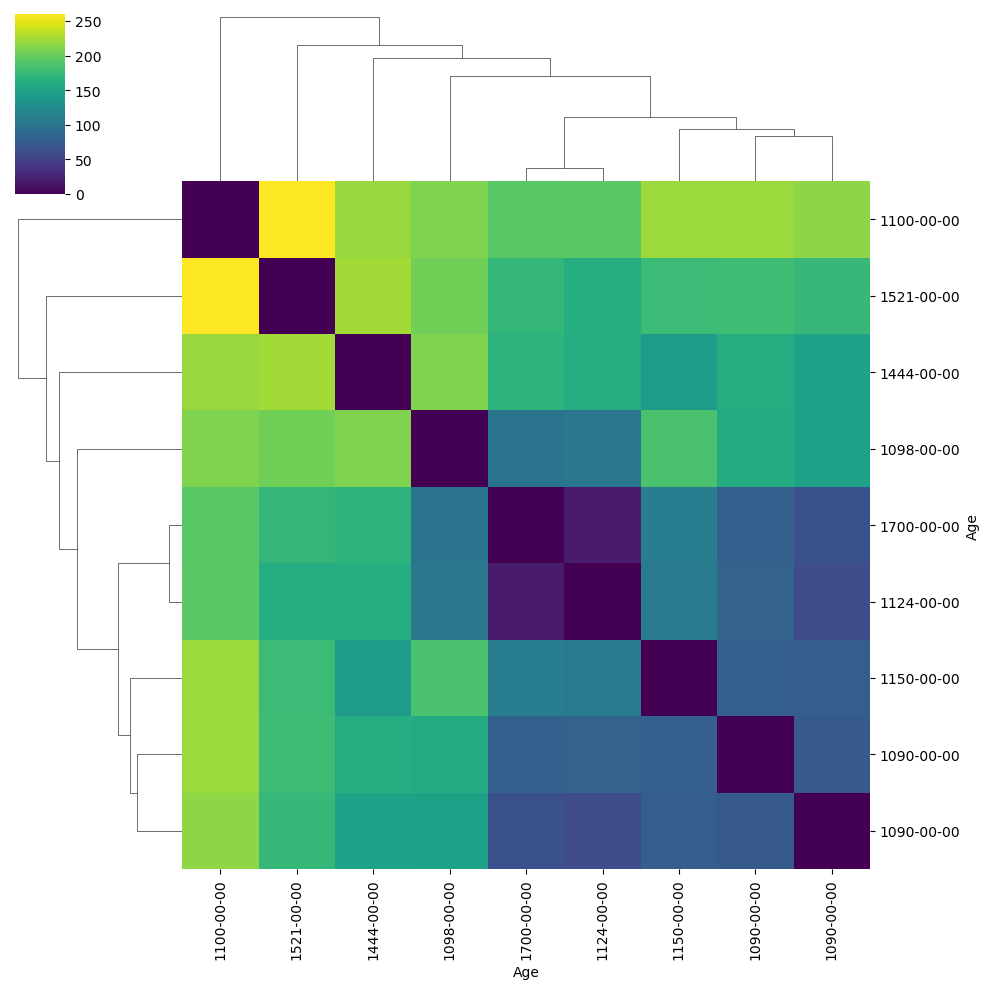

In [8]:
import seaborn as sns
plot = sns.clustermap(llatzer_dist_df, cmap="viridis", metric="euclidean")
plot.savefig("llatzer_by_age.png")

## Now for Magdalen!

In [9]:
magda_meta = metadata.iloc[mary_inds]

magda_df = pd.DataFrame(magdalen.T)
samples = magda_meta["Sample_Name"]
ages = magda_meta["Age"]
magda_df.rows = samples

/var/folders/g2/5glzdcws7bbg271xmljmgdqh0000gn/T/ipykernel_25568/3755042664.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  magda_df.rows = samples


In [10]:
n = magda_df.shape[0]
dist = np.zeros((n, n))

G = magda_df.values.astype(float)
n = G.shape[0]

dist = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        mask = ~np.isnan(G[i]) & ~np.isnan(G[j])
        d = np.sum(G[i,mask] != G[j,mask])
        dist[i,j] = dist[j,i] = d

magda_dist_df = pd.DataFrame(dist, index=samples, columns=samples)

/Users/skylarwalters/miniconda3/envs/cs2370/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/skylarwalters/miniconda3/envs/cs2370/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


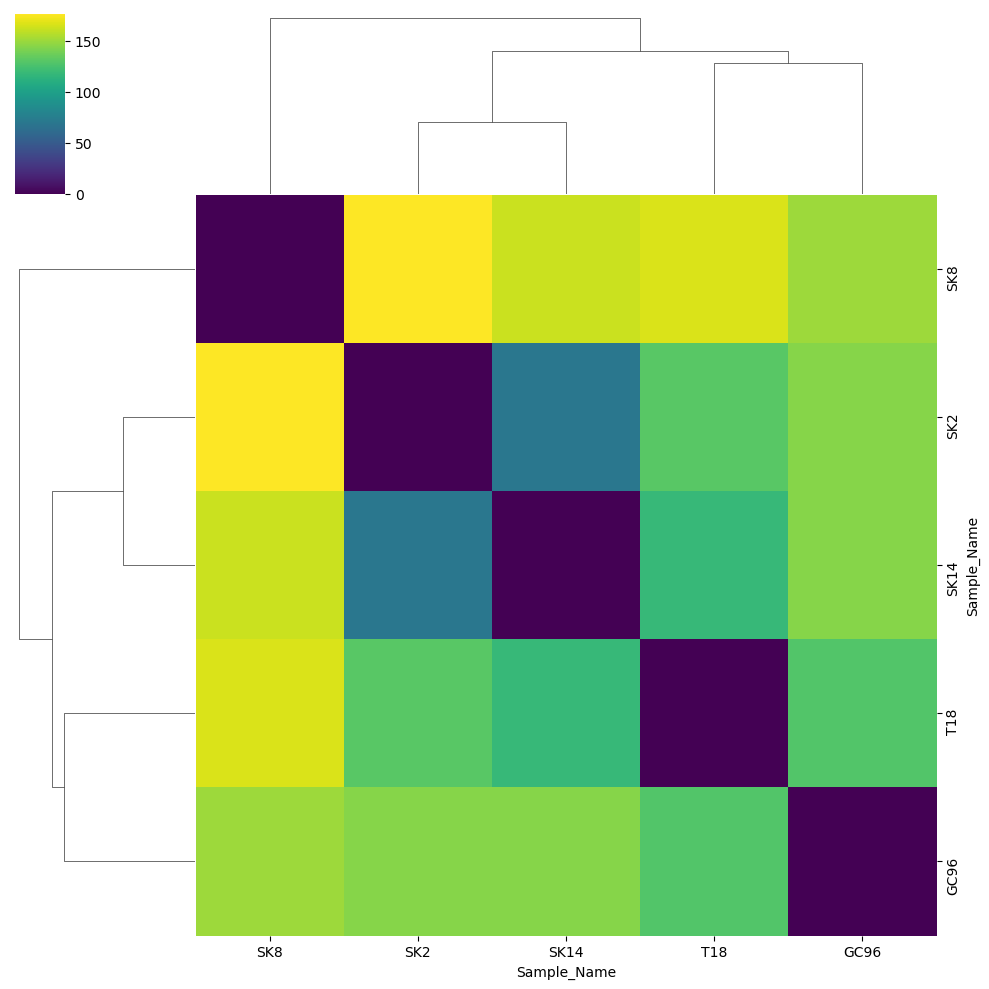

In [11]:
import seaborn as sns
plot.savefig("magdalen_by_sample.png")